El objetivo de este proyecto es identificar variables que permitan construir un modelo para instituciones financieras para predecir los pagos por incumplimiento de los clientes de tarjetas de crédito en los siguientes meses. La deteccion temprana de riesgo de incumplimiento ayudaría en la evaluación de riesgos y proporcionaría una toma de decisiones objetiva para la aprobación de futuros aumentos o disminuciones en el límite de crédito, tipo de interés en función del riesgo del cliente e identificar posibles esquemas de pago de deuda para clientes objetivo.

El set de datos fue obtenido en Kaggle, contiene información de clientes de tarjeta de crédito en Taiwán de abril 2005 hasta Septiembre 2005. El dataset contiene información de 30,000 tarjetahabientes durante el período de tiempo mencionado, con 25 columnas de información.



Las siguientes son una breve descripción de las características de las variables del set de datos.

ID: Customer ID
Limit_Bal: customer credit limit in NTD

Sex: 1=Male, 2=Female

Education: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

Marriage: 1=married, 2=single, 3=others

Age: Customer age in years

Pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

Pay_2: Repayment status in August 2005 (as above scale)

Pay_3: Repayment status in July 2005 (as above scale)

Pay_4: Repayment status in June 2005 (as above scale)

Pay_5: Repayment status in May 2005 (as above scale)

Pay_6: Repayment status in April 2005 (as above scale)

BILL_AMT1: Outstanding bill amount in September 2005/ NTD

BILL_AMT2: Outstanding bill amount in August 2005/ NTD

BILL_AMT3: Outstanding bill amount in July 2005/ NTD

BILL_AMT4: Outstanding bill amount in June 2005/ NTD

BILL_AMT5: Outstanding bill amount in May 2005/ NTD

BILL_AMT6: Outstanding bill amount in April 2005/ NTD

PAY_AMT1: Amount paid in September 2005/ NTD

PAY_AMT2: Amount paid in August 2005/ NTD

PAY_AMT3: Amount paid in July 2005/ NTD

PAY_AMT4: Amount paid in June 2005/ NTD

PAY_AMT5: Amount paid in May 2005/ NTD

PAY_AMT6: Amount paid in April 2005/ NTD


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sb
import modules 

# Proyecto 2
1.1 Analisis Exploratorio de Datos



In [2]:
datos = pd.read_csv('UCI_Credit_Card.csv')
datos.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
datos.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [4]:
datos.shape

(30000, 25)

In [5]:
datos.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


1.2 Limpieza de Datos
Se eliminarán las columnas que no aportan valor al análisis.

In [7]:
datos= datos.drop(columns= ['ID'])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [8]:
datos.rename(columns={'default.payment.next.month':'default'}, inplace=True)

Balanceo de los datos en funcion del Target

La columna default.payment.next.month clasifica a cada cliente según haya incumplido su pago de tarjeta de crédito en octubre, es decir 1 para si y 0 para no. Esta columna se utilizará en el modelo para predecir en función de las características restantes en el dataset.

In [9]:

datos['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [10]:
datos.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

1.3 Analisis de Variables

In [11]:
datos.head()

datos.groupby('default').count()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


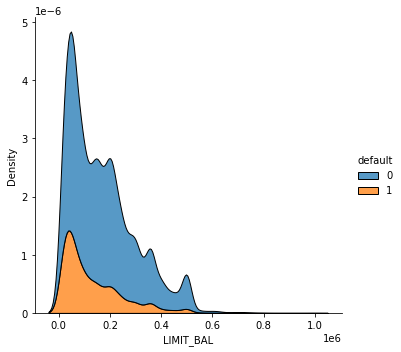

In [12]:
sb.displot(datos, x="LIMIT_BAL", hue="default", kind="kde", multiple="stack")

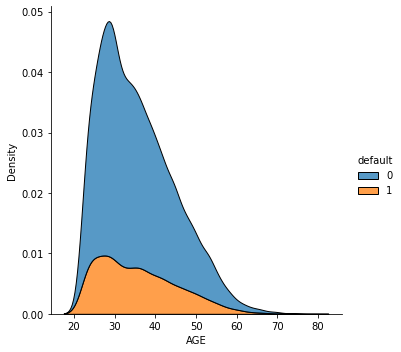

In [13]:
sb.displot(datos, x="AGE", hue="default", kind="kde", multiple="stack")

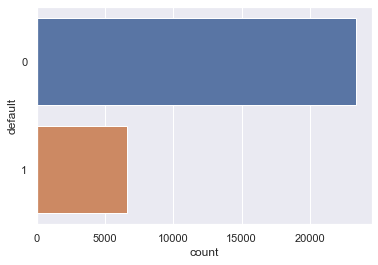

In [16]:
sb.set_theme(style="darkgrid")
ax = sb.countplot(y="default", data=datos)

figure = ax.get_figure()    
figure.savefig('default.png', dpi=400)

c:\Users\sandy\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\sandy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


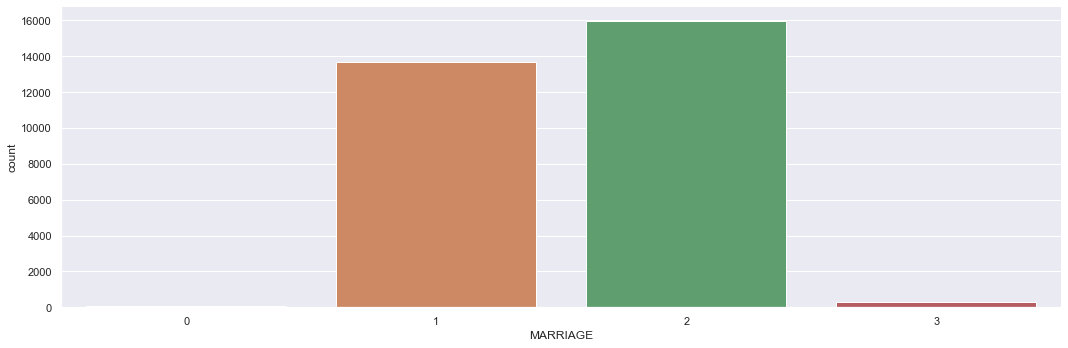

In [17]:
p=sb.factorplot('MARRIAGE', data= datos, kind= "count", aspect= 3)


Variables Discretas

In [18]:
categoric_vars, discrete_vars, continues_vars = modules.getColumnsDataTypes(df=datos)
print(len(categoric_vars) + len(discrete_vars) + len(continues_vars))
discrete_vars.remove('default')

24


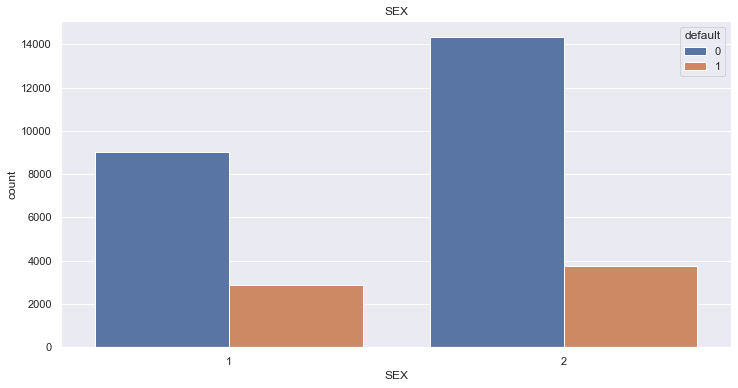

2    18112
1    11888
Name: SEX, dtype: int64


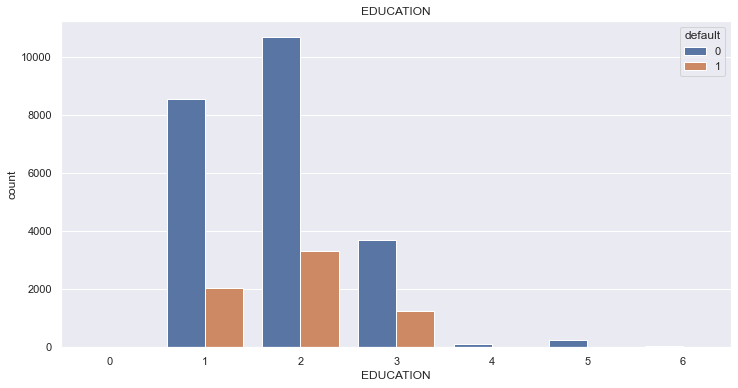

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


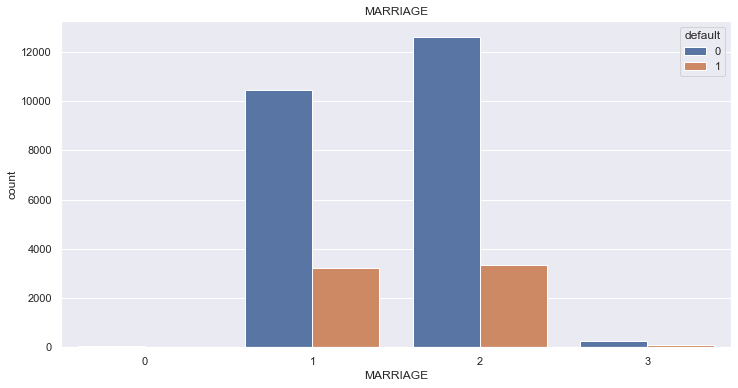

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


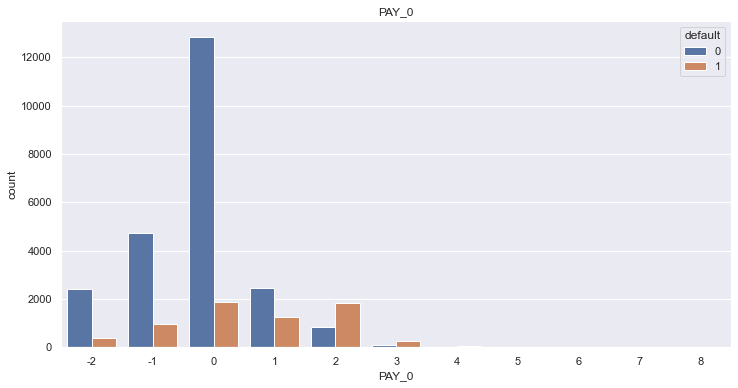

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


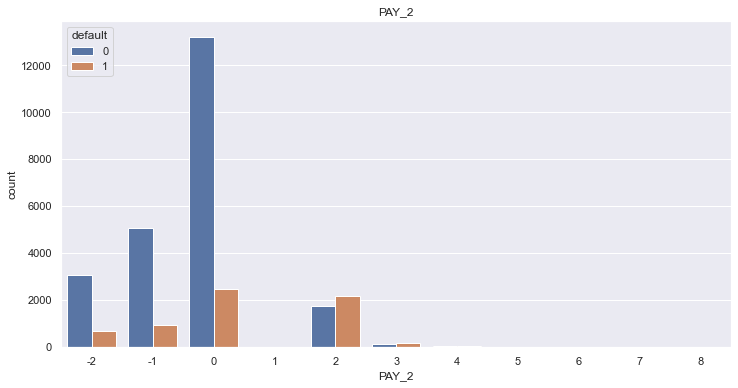

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


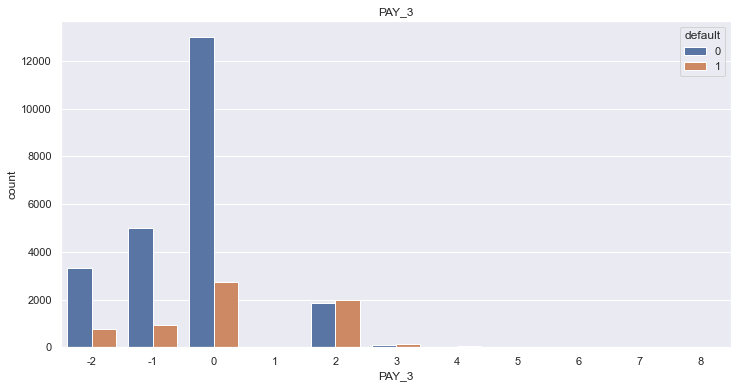

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


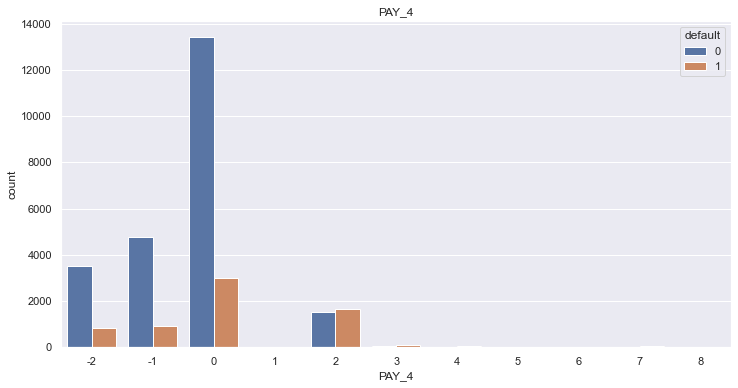

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


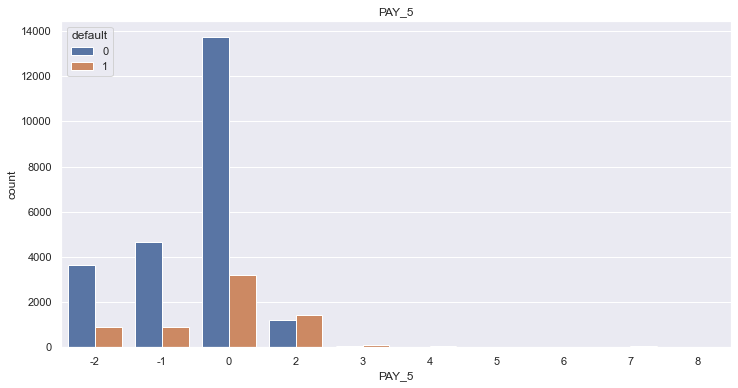

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


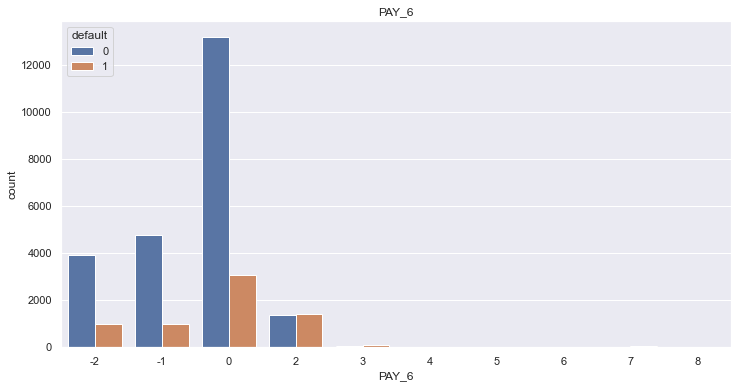

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


In [19]:
modules.plotCategoricalVals(datos, discrete_vars, y='default')

Variables Continuas

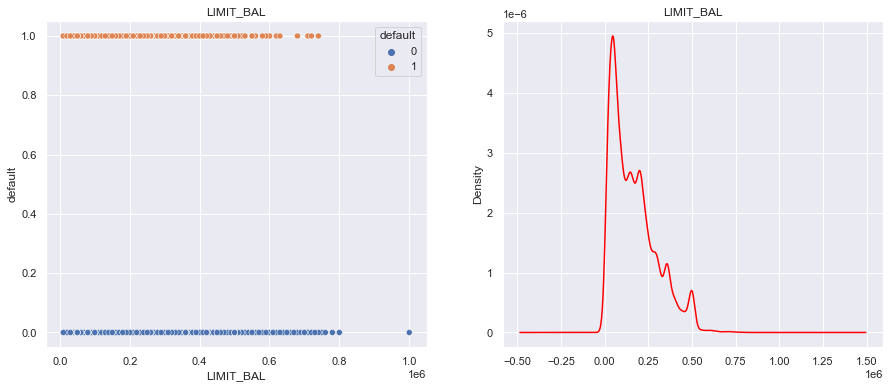

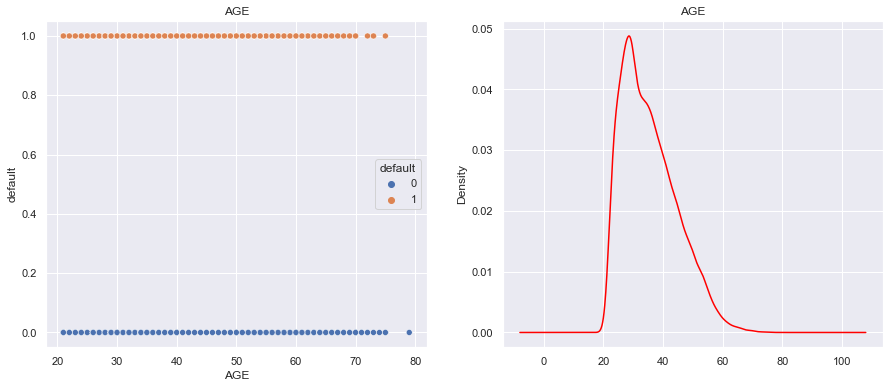

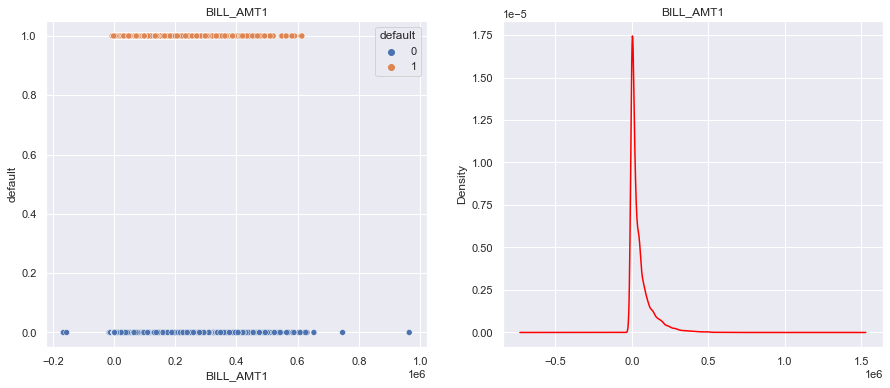

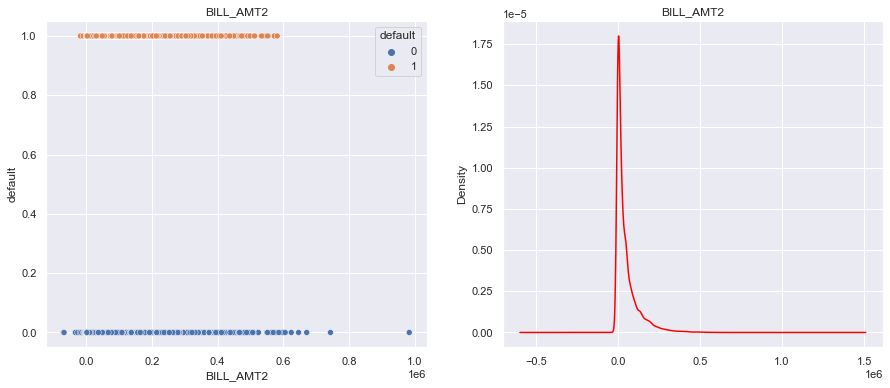

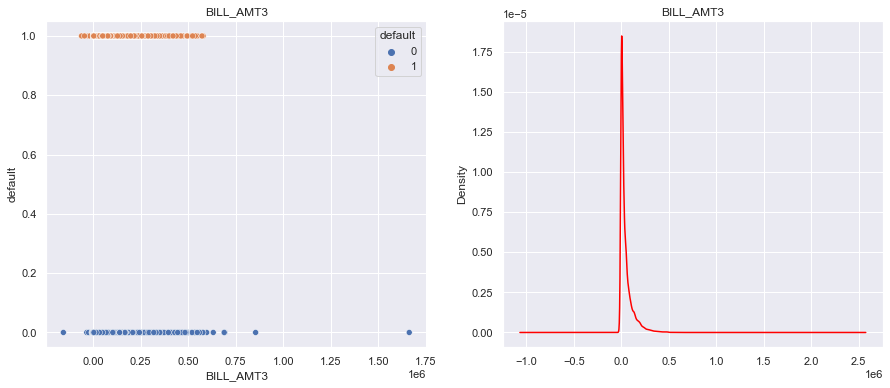

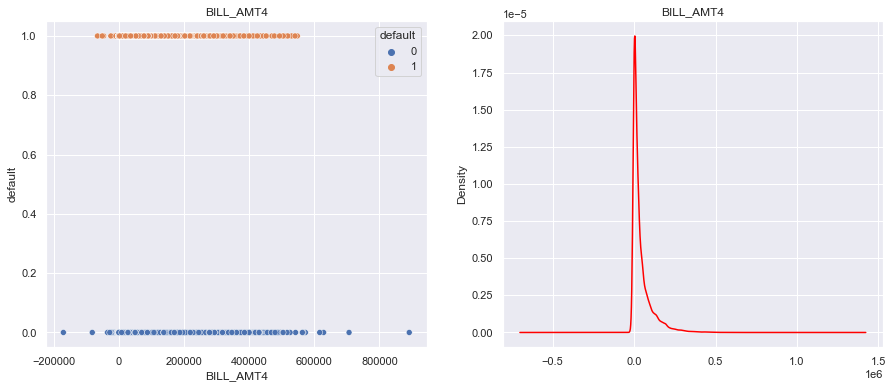

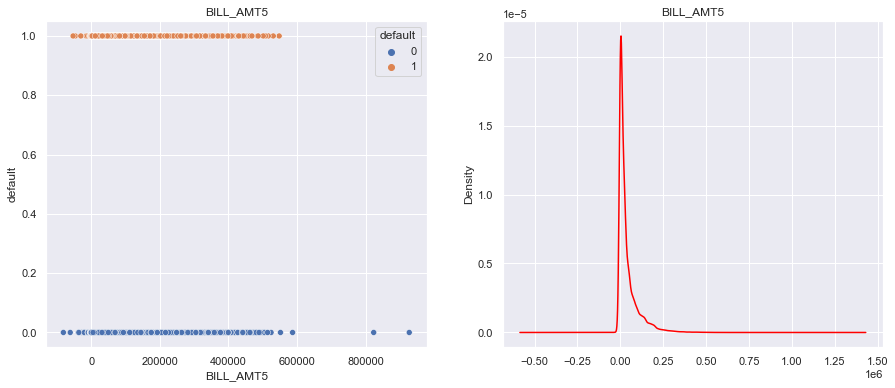

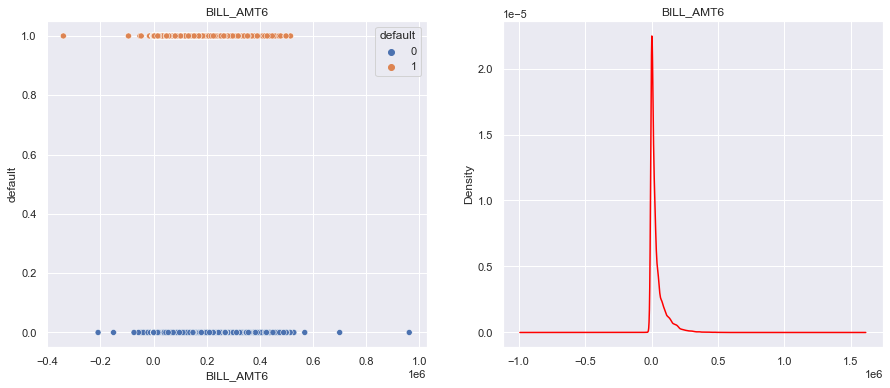

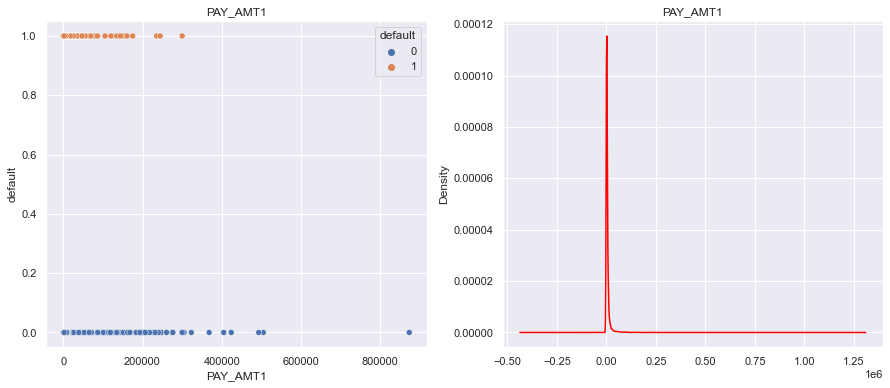

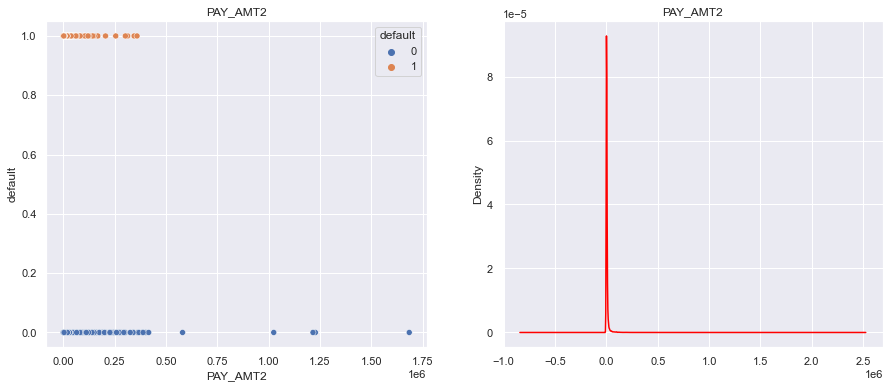

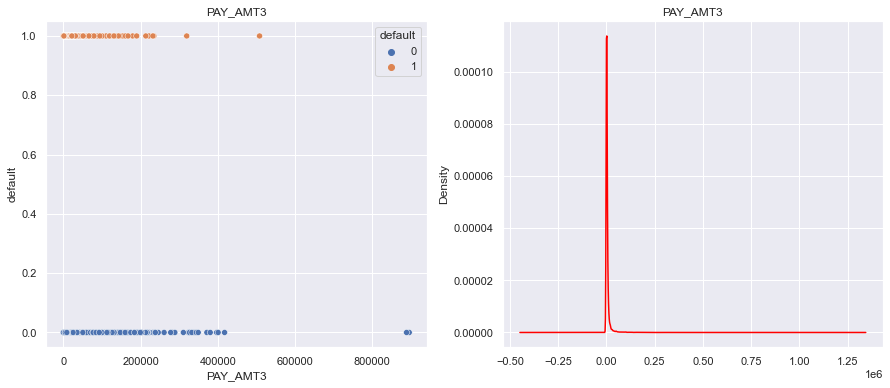

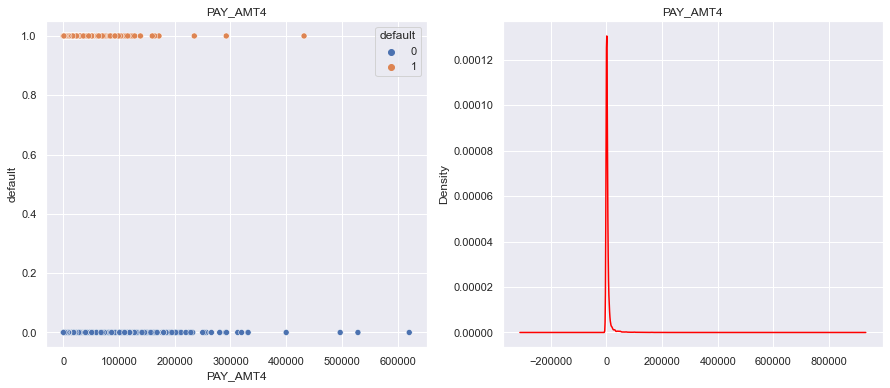

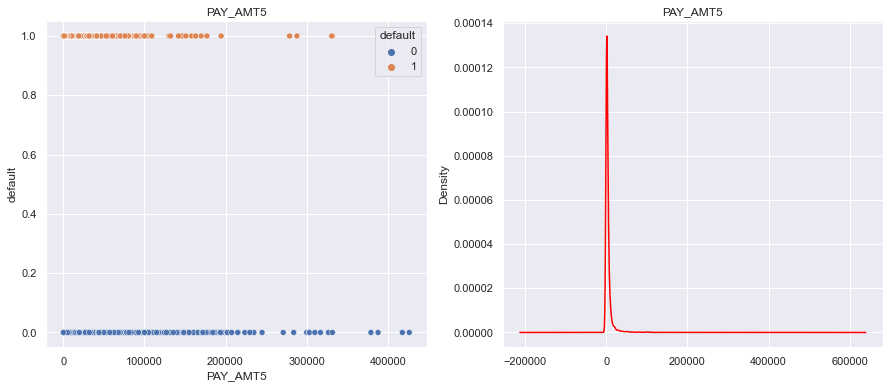

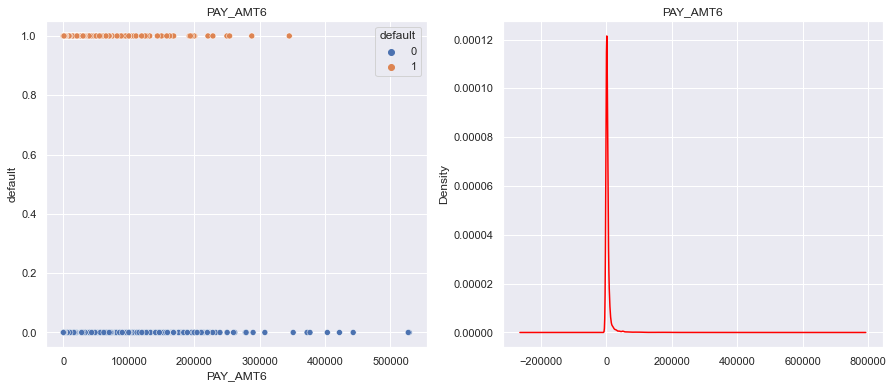

In [20]:
modules.plotContinueVals(datos, continues_vars, y='default')

1.5 Interpretacion de los Resultados

Como se observó en las gráficas anteriores la tase de incumplimento es relativamente alta y se concentra en personas en edad entre 20 a 30 años, en clientes por escolaridad que están en Universidad, en cuanto a género tienen distribución similar y en cuanto a estado civil las personas que están solteras tienen mayor incumplimiento respecto a los otros.
Así mismo se observó que los datos se encuentran desbalanceados ya que al observar los datos el 22% han incumplido mientras que el 88% no ha incumplido en sus pagos, este punto es importante a considerar al momento de generar un modelo de predicción.

In [ ]:

datos.to_csv('dataset_1.csv')